In [134]:
from functions import *

In [135]:
data = pd.read_csv("df_clean.csv",index_col=[0],low_memory=False)

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        10000 non-null  object
 1   Body         10000 non-null  object
 2   Tags         10000 non-null  object
 3   Score        10000 non-null  int64 
 4   clean_Title  10000 non-null  object
 5   clean_Body   10000 non-null  object
 6   Lemm_Body    10000 non-null  object
 7   Lemm_Title   9998 non-null   object
 8   stem_Body    10000 non-null  object
 9   stem_Title   10000 non-null  object
 10  clean_Tags   10000 non-null  object
 11  tag_count    10000 non-null  int64 
 12  tok          10000 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.1+ MB


In [137]:
data=data.dropna()
data.head()

,Title,Body,Tags,Score,clean_Title,clean_Body,Lemm_Body,Lemm_Title,stem_Body,stem_Title,clean_Tags,tag_count,tok
0,WPF MVVM Correct way to fire event on view fro...,<p>In my WPF application I have 2 Windows (bot...,<.net><wpf><mvvm><binding><command>,22,wpf mvvm correct way to fire event on view fro...,in my wpf applic i have 2 window both window h...,wpf applic window window viewmodel applic main...,wpf mvvm correct way fire event view viewmodel,in my wpf applic i have 2 window both window h...,wpf mvvm correct way to fire event on view fro...,.net wpf mvvm bind command,5,"['.net', 'wpf', 'mvvm', 'bind', 'command']"
1,How to identify if the DLL is Debug or Release...,<blockquote>\n <p><strong>Possible Duplicate:...,<.net><dll><build><debugging><release>,117,how to identifi if the dll is debug or releas ...,possibl duplic how to tell if a net applic was...,possibl duplic tell net applic compil debug re...,identifi dll debug relea build net,possibl duplic how to tell if a net applic was...,how to identifi if the dll is debug or relea b...,.net dll build debugging release,5,"['.net', 'dll', 'build', 'debugging', 'release']"
2,Collection was modified; enumeration operation...,"<p>I have ""Collection was modified; enumeratio...",<c#><http><exception><http-headers><httpclient>,10,collect was modifi enumer oper may not execut ...,i have collect was modifi enumer oper may not ...,collect modifi enumer oper execut popul random...,collect modifi enumer oper execut random pop http,i have collect was modifi enum oper may not ex...,collect was modifi enum oper may not execut ra...,http exception http header httpclient,5,"['http', 'exception', 'http', 'header', 'httpc..."
3,Force CamelCase on ASP.NET WebAPI Per Controller,"<p>In ASP.NET WebAPI, I know you can set the d...",<asp.net><json><asp.net-web-api><json.net><cam...,34,forc camelcas on asp net webapi per control,in asp net webapi i know you can set the defau...,asp net webapi know set default json formatt u...,forc camelcas asp net webapi control,in asp net webapi i know you can set the defau...,forc camelca on asp net webapi per control,asp.net json asp.net web api json.net camelcase,7,"['asp.net', 'json', 'asp.net', 'web', 'api', '..."
4,When is it Appropriate to use Generics Versus ...,<p>What are the situations and their associate...,<c#><.net><vb.net><generics><inheritance>,18,when is it appropri to use generic versus inherit,what are the situat and their associ benefit o...,situat associ benefit use generic inherit vice...,appropri use generic versus inherit,what are the situat and their associ benefit o...,when is it appropri to use generic versus inherit,.net vb.net generic inheritance,4,"['.net', 'vb.net', 'generic', 'inheritance']"


### Prétraitement sur la colonne des Tags
 Prendre les 100 tags les plus fréquentés

In [138]:
top_N = 100

# tokenize
data['token_Tags'] = data.clean_Tags.apply(nltk.tokenize.word_tokenize)

# all tokenized words to a list
words = data.token_Tags.tolist()  # this is a list of lists
words = [word for list_ in words for word in list_]

# frequency distribution
word_dist = nltk.FreqDist(words)

# output the results
rslt = pd.DataFrame(word_dist.most_common(top_N), columns=['Word', 'Frequency'])
rslt.head()

,Word,Frequency
0,java,1174
1,python,1077
2,android,939
3,.net,935
4,javascript,910


### Avec un temps d’exécution raisonnable des algorithmes j’ai décidé d’utiliser tous les tags pour un meilleur résultat

In [139]:
#data['top_Tags'] = data['clean_Tags'].apply(lambda x: ' '.join([i for i in x.split() if i in (rslt['Word'])]))
#data.dropna(subset=['top_Tags'], inplace=True)
print(data.shape)
data.head(3)

(9998, 14)


,Title,Body,Tags,Score,clean_Title,clean_Body,Lemm_Body,Lemm_Title,stem_Body,stem_Title,clean_Tags,tag_count,tok,token_Tags
0,WPF MVVM Correct way to fire event on view fro...,<p>In my WPF application I have 2 Windows (bot...,<.net><wpf><mvvm><binding><command>,22,wpf mvvm correct way to fire event on view fro...,in my wpf applic i have 2 window both window h...,wpf applic window window viewmodel applic main...,wpf mvvm correct way fire event view viewmodel,in my wpf applic i have 2 window both window h...,wpf mvvm correct way to fire event on view fro...,.net wpf mvvm bind command,5,"['.net', 'wpf', 'mvvm', 'bind', 'command']","[.net, wpf, mvvm, bind, command]"
1,How to identify if the DLL is Debug or Release...,<blockquote>\n <p><strong>Possible Duplicate:...,<.net><dll><build><debugging><release>,117,how to identifi if the dll is debug or releas ...,possibl duplic how to tell if a net applic was...,possibl duplic tell net applic compil debug re...,identifi dll debug relea build net,possibl duplic how to tell if a net applic was...,how to identifi if the dll is debug or relea b...,.net dll build debugging release,5,"['.net', 'dll', 'build', 'debugging', 'release']","[.net, dll, build, debugging, release]"
2,Collection was modified; enumeration operation...,"<p>I have ""Collection was modified; enumeratio...",<c#><http><exception><http-headers><httpclient>,10,collect was modifi enumer oper may not execut ...,i have collect was modifi enumer oper may not ...,collect modifi enumer oper execut popul random...,collect modifi enumer oper execut random pop http,i have collect was modifi enum oper may not ex...,collect was modifi enum oper may not execut ra...,http exception http header httpclient,5,"['http', 'exception', 'http', 'header', 'httpc...","[http, exception, http, header, httpclient]"


# Séparation des données en base de training et de test

#### Préparration des données d'apprentissage

Les algorithmes pourraient être appliquer sur les variables ‘Title’, ‘Body’ ou les deux pour obtenir les ‘Tags’ qui sont nos target.
Après avoir vérifier sur le site StackOverflow, j’ai constaté que le ‘Title’ est un sous-ensemble de ‘Body’, je continu tout de même d’appliquer les algorithme sur les deux variable pour les comparer ensuite.


In [140]:
X_Title = data.Lemm_Title
X_Body = data.Lemm_Body
y = data.clean_Tags

Fractionnement des données en train et test

In [141]:
X_Title_train, X_Title_test, y_Title_train, y_Title_test = train_test_split(X_Title, y, test_size = 0.3, random_state = 42)
X_Body_train, X_Body_test, y_Body_train, y_Body_test = train_test_split(X_Body, y, test_size = 0.3, random_state = 42)

In [142]:
print(X_Title_train.shape, X_Title_test.shape, y_Title_train.shape, y_Title_test.shape)
print(X_Body_train.shape, X_Body_test.shape, y_Body_train.shape, y_Body_test.shape)

(6998,) (3000,) (6998,) (3000,)
(6998,) (3000,) (6998,) (3000,)


### Prétraitement des colonnes 'Lemm_Body' et 'Lemm_Title'

In [143]:
# Initialisation du vectoriseur TF-IDF 
vectorizer_Title_tfidf = TfidfVectorizer(stop_words='english')
vectorizer_Body_tfidf= TfidfVectorizer(stop_words='english')

X_tfidf_Title_train = vectorizer_Title_tfidf.fit_transform(X_Title_train).toarray()
X_tfidf_Title_test = vectorizer_Title_tfidf.transform(X_Title_test).toarray()
feature_names_Title_tfidf = vectorizer_Title_tfidf.get_feature_names_out()

X_tfidf_Body_train = vectorizer_Body_tfidf.fit_transform(X_Body_train).toarray()
X_tfidf_Body_test = vectorizer_Body_tfidf.transform(X_Body_test).toarray()
feature_names_Body_tfidf = vectorizer_Body_tfidf.get_feature_names_out()


# Initialisation du vectoriseur CountVectorizer  
vectorizer_Title_cv = CountVectorizer(analyzer='word')
vectorizer_Body_cv = CountVectorizer(analyzer='word')

X_cv_Title_train = vectorizer_Title_cv.fit_transform(X_Title_train).toarray()
X_cv_Title_test = vectorizer_Title_cv.transform(X_Title_test).toarray()
feature_names_Title_cv = vectorizer_Title_cv.get_feature_names_out()

X_cv_Body_train = vectorizer_Body_cv.fit_transform(X_Body_train).toarray()
X_cv_Body_test = vectorizer_Body_cv.transform(X_Body_test).toarray()
feature_names_Body_cv = vectorizer_Body_cv.get_feature_names_out()


### Préparation de la colone cible
#### Encoder les Tags en appliquant MultiLabelBinarizer pour constituer le target 

In [144]:
multilabel_binarizer_Title = MultiLabelBinarizer()

y_mlbl_Title_train = multilabel_binarizer_Title.fit_transform(y_Title_train)
y_mlbl_Title_test = multilabel_binarizer_Title.transform(y_Title_test)


multilabel_binarizer_Body = MultiLabelBinarizer()

y_mlbl_Body_train = multilabel_binarizer_Body.fit_transform(y_Body_train)
y_mlbl_Body_test = multilabel_binarizer_Body.transform(y_Body_test)


In [145]:
print("X_tfidf_Title_train" , X_tfidf_Title_train.shape)
print("X_tfidf_Title_test" , X_tfidf_Title_test.shape)
print("X_tfidf_Body_train" , X_tfidf_Body_train.shape)
print("X_tfidf_Body_test" , X_tfidf_Body_test.shape)
print("X_cv_Title_train" , X_cv_Title_train.shape)
print("X_cv_Title_test" , X_cv_Title_test.shape)
print("X_cv_Body_train" , X_cv_Body_train.shape)
print("X_cv_Body_test" , X_cv_Body_test.shape)

print("y_mlbl_Title_train" , y_mlbl_Title_train.shape)
print("y_mlbl_Title_test" , y_mlbl_Title_test.shape)
print("y_mlbl_Body_train" , y_mlbl_Body_train.shape)
print("y_mlbl_Body_test" , y_mlbl_Body_test.shape)

X_tfidf_Title_train (6998, 5826)
X_tfidf_Title_test (3000, 5826)
X_tfidf_Body_train (6998, 44432)
X_tfidf_Body_test (3000, 44432)
X_cv_Title_train (6998, 5848)
X_cv_Title_test (3000, 5848)
X_cv_Body_train (6998, 44473)
X_cv_Body_test (3000, 44473)
y_mlbl_Title_train (6998, 41)
y_mlbl_Title_test (3000, 41)
y_mlbl_Body_train (6998, 41)
y_mlbl_Body_test (3000, 41)


## Obtenir les noms des feature et l'index tf-idf des n premiers éléments

In [146]:
def sort_coo(coo_matrix):
    """Sort a dict with highest score"""
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn):
    
   #utiliser uniquement les éléments topn du vecteur
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []
    
    # index de mots et score tf-idf correspondant
    for idx, score in sorted_items:
        
        #garder une trace du nom de la feature et de son index correspondant
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #créer un tuple de fonctionnalité, score
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

    #Renvoyer les k principaux mots-clés d'un document à l'aide de la méthode TF-IDF
def get_keywords(vectorizer, feature_names, doc):

    # générer tf-idf pour le document donné
    tf_idf_vector = vectorizer.transform([doc])
    
    #trier les vecteurs tf-idf par ordre décroissant des indexs
    sorted_items=sort_coo(tf_idf_vector.tocoo())

    #extraction de TOP_K_KEYWORDS
    keywords=extract_topn_from_vector(feature_names,sorted_items,5)
    
    return list(keywords.keys())

In [147]:
result = []
result1 = []

for doc in data.Lemm_Title[0:10]:
    df = {}
    df['full_text'] = doc
    df['Title_top_keywords_tfidf'] = get_keywords(vectorizer_Title_tfidf, feature_names_Title_tfidf, doc)
    df['Title_top_keywords_cv'] = get_keywords(vectorizer_Title_cv, feature_names_Title_cv, doc)
    df['Body_top_keywords_tfidf'] = get_keywords(vectorizer_Body_tfidf, feature_names_Body_tfidf, doc)
    df['Body_top_keywords_cv'] = get_keywords(vectorizer_Body_cv, feature_names_Body_cv, doc)
    result.append(df)

final = pd.DataFrame(result )

final

,full_text,Title_top_keywords_tfidf,Title_top_keywords_cv,Body_top_keywords_tfidf,Body_top_keywords_cv
0,wpf mvvm correct way fire event view viewmodel,"[viewmodel, mvvm, correct, wpf, view]","[wpf, way, viewmodel, view, mvvm]","[mvvm, viewmodel, wpf, event, view]","[wpf, way, viewmodel, view, mvvm]"
1,identifi dll debug relea build net,"[identifi, relea, dll, debug, build]","[relea, net, identifi, dll, debug]","[dll, identifi, relea, debug, net]","[relea, net, identifi, dll, debug]"
2,collect modifi enumer oper execut random pop http,"[pop, enumer, modifi, random, collect]","[random, pop, oper, modifi, http]","[enumer, pop, random, modifi, collect]","[random, pop, oper, modifi, http]"
3,forc camelcas asp net webapi control,"[webapi, forc, control, asp, net]","[webapi, net, forc, control, asp]","[webapi, forc, asp, control, net]","[webapi, net, forc, control, asp]"
4,appropri use generic versus inherit,"[appropri, versus, inherit, generic, use]","[versus, use, inherit, generic, appropri]","[versus, appropri, inherit, generic, use]","[versus, use, inherit, generic, appropri]"
5,junit failur callback method,"[failur, junit, callback, method]","[method, junit, failur, callback]","[junit, failur, callback, method]","[method, junit, failur, callback]"
6,mac os equival 32feet bluetooth,"[32feet, bluetooth, mac, os, equival]","[os, mac, equival, bluetooth, 32feet]","[32feet, bluetooth, mac, equival, os]","[os, mac, equival, bluetooth, 32feet]"
7,benefit std liter inlin namespac,"[benefit, liter, inlin, namespac, std]","[std, namespac, liter, inlin, benefit]","[liter, benefit, inlin, namespac, std]","[std, namespac, liter, inlin, benefit]"
8,structur virtualenv environ look like,"[virtualenv, look, environ, structur, like]","[virtualenv, structur, look, like, environ]","[virtualenv, environ, structur, look, like]","[virtualenv, structur, look, like, environ]"
9,load xml file path,"[path, xml, load, file]","[xml, path, load, file]","[xml, path, load, file]","[xml, path, load, file]"


### Nous allons essayer de réduire le mubre des dimmention avec la methode PCA

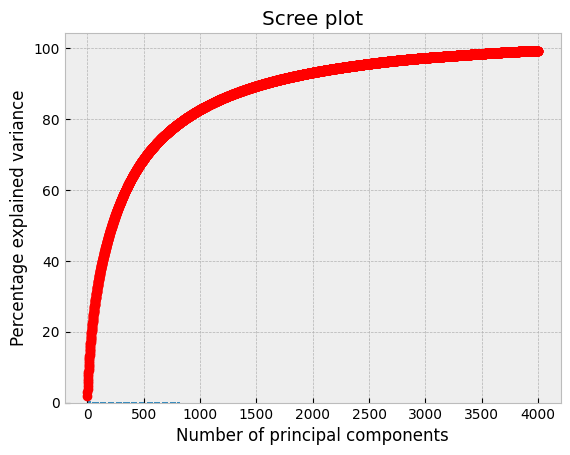

In [148]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn import decomposition

pca = decomposition.PCA(n_components=4000)#len(acp_vars))
pca.fit(X_cv_Title_train)
X_projected = pca.transform(X_cv_Title_train)

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("Number of principal components")
plt.ylabel("Percentage explained variance")
plt.title("Scree plot")
plt.show(block=False)



### Pour expliquer une part significative des données (98%) nous avons besoins de plus de 4000 dimensions. Le PCA ne réduisant pas suffisamment les dimensions, j’ai décidé de m’en passer.

In [149]:
pca.explained_variance_ratio_.sum().round(2)

0.99

# Approche supervisée classique

### La mise en œuvre une approche OneVsRestClassifier testée sur différents algorithmes

sgd = SGDClassifier()

lr = LogisticRegression()

mn = MultinomialNB()

perceptron = Perceptron()

pac = PassiveAggressiveClassifier()

lsvc = LinearSVC()

#### Exécution des modèles

* Score Jacard utilisé pour déterminer à quel point les ensembles d'échantillons sont similaires.
* Utilisation de la perte de Hamming

In [150]:

Dic_results = defaultdict(list)

def print_score(y_pred, y_test, clf, X_name):
    #print("Classifier: ", clf.__class__.__name__)
    jacard = np.minimum(y_test,y_pred).sum(axis=1) / np.maximum(y_test,y_pred).sum(axis=1)
    score=jacard.mean()*100
    #print("Jacard score: {}".format(score))
    #print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    F1_Score=metrics.classification_report(y_test, y_pred).split()[-2]
    #print('F1 Score of ',clf.__class__.__name__,":", F1_Score)
    accuracy_nb = accuracy_score(y_test, y_pred)
    #print("-----------------------------------------------------------") 
    #Récolte des informations pour une analyse globale 
    input = [('data Vectorized', X_name),
                ('Alg_name', clf.__class__.__name__), 
                ('Jacard score', score),
                ('Hamming loss', hamming_loss(y_pred, y_test)*100), 
                ('F1 Score',F1_Score)
                #('accuracy Score',accuracy_nb)
                
]       
    for key, value in input:
        Dic_results[key].append(value)

### Application des algorithmes sur 'Title' avec Tf-idf

In [151]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import svm

#rfc = RandomForestClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
mn = MultinomialNB()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
lsvc = LinearSVC()

for classifier in [ sgd, lr, mn, perceptron, pac,lsvc]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_tfidf_Title_train, y_mlbl_Title_train)
    y_pred = clf.predict(X_tfidf_Title_test)
    print_score(y_pred, y_mlbl_Title_test, classifier,'X_tfidf_Title_train')

### Application des algorithmes sur 'Title' avec CountVectorizer

In [152]:
for classifier in [ sgd, lr, mn, perceptron, pac, lsvc]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_cv_Title_train, y_mlbl_Title_train)
    y_pred = clf.predict(X_cv_Title_test)
    print_score(y_pred, y_mlbl_Title_test, classifier,'X_cv_Title_train')

### Application des algorithmes sur 'Body' avec Tf-idf

In [153]:
for classifier in [ sgd, lr, mn, perceptron, pac, lsvc]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_tfidf_Body_train, y_mlbl_Body_train)
    y_pred = clf.predict(X_tfidf_Body_test)
    print_score(y_pred, y_mlbl_Body_test, classifier,'X_tfidf_Body_train')

### Application des algorithmes sur 'Body' avec CountVectorizer

In [154]:
for classifier in [sgd, lr, mn, perceptron, pac, lsvc]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_cv_Body_train, y_mlbl_Body_train)
    y_pred = clf.predict(X_cv_Body_test)
    print_score(y_pred, y_mlbl_Body_test, classifier,'X_cv_Body_train')

In [155]:
for i in range(y_mlbl_Title_train.shape[1]):
    print(multilabel_binarizer_Title.classes_[i])
    print(confusion_matrix(y_mlbl_Title_test[:,i], y_pred[:,i]))
    print("")

 
[[3000]]

#
[[2984    5]
 [  10    1]]

+
[[2666   77]
 [ 138  119]]

-
[[2395  184]
 [ 340   81]]

.
[[2116  245]
 [ 391  248]]

0
[[2722   99]
 [ 153   26]]

1
[[2795   66]
 [ 119   20]]

2
[[2622  110]
 [ 233   35]]

3
[[2762   79]
 [ 143   16]]

4
[[2843   48]
 [ 100    9]]

5
[[2859   40]
 [  95    6]]

6
[[2893   28]
 [  68   11]]

7
[[2883   28]
 [  82    7]]

8
[[2856   29]
 [  94   21]]

9
[[2977    7]
 [  16    0]]

a
[[  70  157]
 [ 378 2395]]

b
[[1251  379]
 [ 721  649]]

c
[[ 297  284]
 [ 652 1767]]

d
[[ 852  393]
 [ 751 1004]]

e
[[  23  129]
 [ 225 2623]]

f
[[1601  356]
 [ 617  426]]

g
[[1237  353]
 [ 720  690]]

h
[[1230  391]
 [ 568  811]]

i
[[  86  167]
 [ 430 2317]]

j
[[1758  223]
 [ 434  585]]

k
[[2072  237]
 [ 455  236]]

l
[[ 389  310]
 [ 676 1625]]

m
[[ 663  380]
 [ 781 1176]]

n
[[ 133  222]
 [ 483 2162]]

o
[[ 149  203]
 [ 508 2140]]

p
[[ 431  314]
 [ 739 1516]]

q
[[2398  125]
 [ 235  242]]

r
[[ 160  229]
 [ 483 2128]]

s
[[ 188  244]
 [ 581 1987]]

## Tableau de comparaison pour les résultats de différents algorithmes

In [156]:
df_result = pd.DataFrame.from_dict(Dic_results) 
df_result

,data Vectorized,Alg_name,Jacard score,Hamming loss,F1 Score
0,X_tfidf_Title_train,SGDClassifier,67.228809,15.395935,0.80
1,X_tfidf_Title_train,LogisticRegression,67.290627,15.424390,0.80
2,X_tfidf_Title_train,MultinomialNB,69.604698,15.215447,0.82
3,X_tfidf_Title_train,Perceptron,61.881288,18.830081,0.76
4,X_tfidf_Title_train,PassiveAggressiveClassifier,63.962894,18.087805,0.77
5,X_tfidf_Title_train,LinearSVC,60.500670,17.944715,0.75
6,X_cv_Title_train,SGDClassifier,65.241650,16.476423,0.78
7,X_cv_Title_train,LogisticRegression,68.453552,14.986179,0.81
8,X_cv_Title_train,MultinomialNB,70.713988,14.657724,0.82
9,X_cv_Title_train,Perceptron,63.900314,18.439837,0.77


### Pour le moment le meilleur résultat est obtenu avec l'algorithme MultinomialNB en appliquant la variable 'Title' vectorisée par CountVectorizer

# Approche non supervisée 
#### Pour créer des features en utilisant la technique LDA (Latent Dirichlet Allocation) avec recherche des hyperparamètres
Nous allons entraîner un modèle LDA avec GridSearchCV :

In [157]:
Dic_results_lda = defaultdict(list)

# Créez la matrice document-term avec tfidf :
doc_term_matrix = X_tfidf_Title_train

lda = LatentDirichletAllocation()
params = {'n_components': [5, 10, 15, 20], 'learning_decay': [0.5, 0.7, 0.9], 'random_state':[0,42], 'learning_method':['batch', 'online']}

gridsearch = GridSearchCV(lda, params)
gridsearch.fit(doc_term_matrix)
best_lda_model = gridsearch.best_estimator_
# Transformez les données en utilisant le modèle LDA
lda_output = best_lda_model.transform(doc_term_matrix)
print(gridsearch.best_params_)


{'learning_decay': 0.9, 'learning_method': 'online', 'n_components': 5, 'random_state': 42}


In [158]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(best_lda_model, vectorizer_Title_tfidf.get_feature_names_out(), no_top_words)


Topic 0:
instal window linux fail compil
Topic 1:
use function string net sql
Topic 2:
studio visual use refer dynam
Topic 3:
replac assembl wpf save oper
Topic 4:
use way file good applic


### Les fonctions nécessaires pour l'application et l'évaluation du modèle LDA

In [159]:
Dic_results_lda = defaultdict(list)

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)


def data2Word(texts):
    id2word = corpora.Dictionary(texts)
    corpus = []
    for text in texts:
        new = id2word.doc2bow(text)
        corpus.append(new)
    return id2word, corpus


def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

def lda_model_apply_evaluate(X_train, X_test, nbr_topics, data_name):
    x = X_Title_train.values.tolist()

    docs = list(sent_to_words(x))
    dictionary = Dictionary(docs)

    #bigram = Phrases(docs, min_count=10)
    #trigram = Phrases(bigram[docs])

    # Set parameters.
    num_topics = 10
    passes = 20 
    iterations = 400
    eval_every = 1  
    chunksize = 500

    data_words = gen_words(data['Lemm_Title'])
    id2word, corpus = data2Word(data_words)

    lda_model = gensim.models.LdaModel(corpus=corpus, 
                        id2word=id2word, chunksize=chunksize,
                        alpha='auto', eta='auto', 
                        iterations=iterations, num_topics=num_topics, 
                        passes=passes, eval_every=eval_every)

    # Print the Keyword in the 10 topics
    #print(lda_model.print_topics())

    #perplexity_nb=lda_model.perplexity(corpus_Title_test)
    perplexity_nb = lda_model.log_perplexity(corpus)
    #print('\nnPerplexity: ',perplexity_nb)

    #Compute Coherence Score avec c_v
    coherence_model_lda_c_v = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_lda_c_v = coherence_model_lda_c_v.get_coherence()
    #print('\nCoherence Score: ', coherence_lda)

    # Compute Coherence Score avec UMass
    coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence="u_mass")
    coherence_lda = coherence_model_lda.get_coherence()
    #print('\nCoherence Score: ', coherence_lda)

    #Collecter les informations
    input = [('Model_Data_name', data_name),
            ('Perplexity_nb', perplexity_nb),
            ('Coherence c_v', coherence_lda_c_v), 
            ('Coherence u_mass', coherence_lda)         
        ]    
    for key, value in input:
        Dic_results_lda[key].append(value)

    #Afficher
    # Compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=lda_model, texts=docs, dictionary=dictionary, coherence='c_v')
    coherence_ldas = coherence_model_lda.get_coherence_per_topic()
    print('\nCoherence Score: ', coherence_ldas)    
    
    topicsname=[]
    for i in range(1,num_topics+1):
        topicsname.append("t{0}".format(i))
    topicsname

    plt.plot(topicsname,coherence_ldas)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

    return lda_model

In [160]:
"""# Créez la matrice document-term avec tfidf :
doc_term_matrix = X_tfidf_Body_train

lda = LatentDirichletAllocation()
params = {'n_components': [5, 10, 15, 20], 'learning_decay': [0.5, 0.7, 0.9], 'random_state':[0,42]}
gridsearch = GridSearchCV(lda, params)
gridsearch.fit(doc_term_matrix)
best_lda_model = gridsearch.best_estimator_
# Transformez les données en utilisant le modèle LDA
lda_output = best_lda_model.transform(doc_term_matrix)

# Préparez la nouvelle phrase à prédire
new_phrase = lemmatize(clean_text('Is there a reason why one method works way better than the other? Here how the data input looks like (its the Iris dataset): training_data, Python C++, HTML'))

new_tfidf = vectorizer_Body_tfidf.transform([new_phrase])

# Prédisez les probabilités des mots-clés pour la nouvelle phrase
predicted_probabilities = best_lda_model.transform(new_tfidf)
topic_weights = best_lda_model.components_
# sort topics by relevance
topic_order = np.argsort(topic_weights, axis=1)[:, :-6:-1]
# print top 5 topics
for i in range(1):
    print(f"Topic {i}:")
    top_words = [vectorizer_Body_tfidf.get_feature_names_out()[j] for j in topic_order[i]]
    print(top_words)
    print()

perplexity_nb=best_lda_model.perplexity(X_tfidf_Body_test)
perplexity_nb

#Tab_Topic
Nums_topic = []
Mots_topic = []

for topic_idx, topic in enumerate(best_lda_model.components_):
    Num_topic = "Topic {}".format(topic_idx)
    Mot_topic = [",".join([data['clean_Tags'][i] for i in topic.argsort()[:-10 - 1:-1]])]

    Nums_topic.append(Num_topic)
    Mots_topic.append(Mot_topic)

accuracy_lda = accuracy_score(y_mlbl_Title_test, perplexity_nb)

input = [('Model_Data_name', 'LDA, Body, Tf-idf  '),
            ('Perplexity_nb', perplexity_nb),
            ('Accuracy score', accuracy_lda), 
            ('Topics', Mot_topic)          
        ]    
   
for key, value in input:
    Dic_results_lda[key].append(value)"""

'# Créez la matrice document-term avec tfidf :\ndoc_term_matrix = X_tfidf_Body_train\n\nlda = LatentDirichletAllocation()\nparams = {\'n_components\': [5, 10, 15, 20], \'learning_decay\': [0.5, 0.7, 0.9], \'random_state\':[0,42]}\ngridsearch = GridSearchCV(lda, params)\ngridsearch.fit(doc_term_matrix)\nbest_lda_model = gridsearch.best_estimator_\n# Transformez les données en utilisant le modèle LDA\nlda_output = best_lda_model.transform(doc_term_matrix)\n\n# Préparez la nouvelle phrase à prédire\nnew_phrase = lemmatize(clean_text(\'Is there a reason why one method works way better than the other? Here how the data input looks like (its the Iris dataset): training_data, Python C++, HTML\'))\n\nnew_tfidf = vectorizer_Body_tfidf.transform([new_phrase])\n\n# Prédisez les probabilités des mots-clés pour la nouvelle phrase\npredicted_probabilities = best_lda_model.transform(new_tfidf)\ntopic_weights = best_lda_model.components_\n# sort topics by relevance\ntopic_order = np.argsort(topic_weig

# Entraînez un modèle LDA avec gensim et doc2bow:

In [161]:
#data_words = gen_words(data['Lemm_Body'])
#data_words_Title = gen_words(data['Lemm_Title'])

#id2word, corpus = data2Word(data_words)
#id2word_Title, corpus_Title = data2Word(data_words_Title)

### Application des algorithmes sur 'Body'


Coherence Score:  [0.7506287696139032, 0.740789132160287, 0.7398655195626936, 0.7548691366394082, 0.7389182333213137, 0.7337939345868165, 0.6964003953254225, 0.7379081836619931, 0.7328644004071817, 0.7465324803897707]


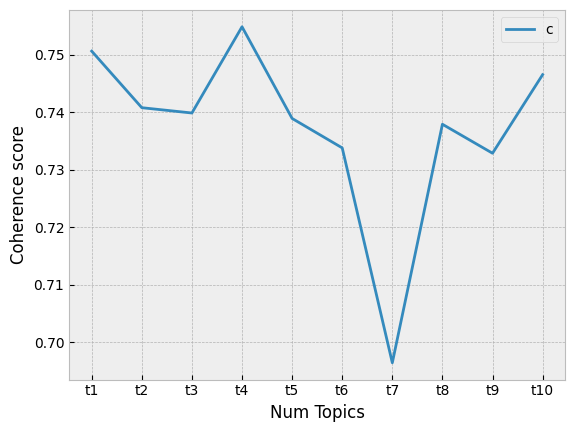

In [162]:
model_lda = lda_model_apply_evaluate(X_Body_train, X_Body_test, 5, "X_Body_train")

### Application des algorithmes sur 'Title' 


Coherence Score:  [0.7180449065646946, 0.737566160319559, 0.754475220566566, 0.7207873952131104, 0.7439060845401089, 0.7303923726660441, 0.7007550617909791, 0.7618939560426098, 0.7508826733879517, 0.7238507037096124]


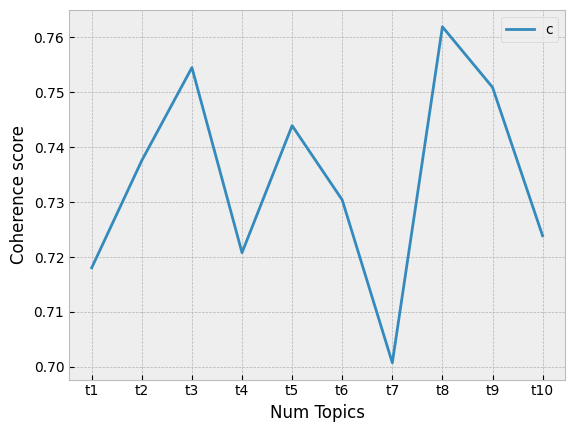

In [163]:
lda_model_apply_evaluate(X_Title_train, X_Title_test, 5, "X_Title_train")

## Tableau de comparaison pour les résultats de différents algorithmes

In [164]:
df_result_lda = pd.DataFrame.from_dict(Dic_results_lda) 
df_result_lda

,Model_Data_name,Perplexity_nb,Coherence c_v,Coherence u_mass
0,X_Body_train,-8.211580,0.737257,-19.922710
1,X_Title_train,-8.210164,0.734255,-19.890908


In [165]:
# Affichage des noms des 10 premiers topics avec les 10 mots les plus représentatifs
#for i in range(10):
 #   print(f"Topic {i}: {lda_model.show_topic(i, topn=10)}")



In [166]:
from sklearn.decomposition import LatentDirichletAllocation

document = X_cv_Title_train
n_topics = 20

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5, 
        learning_method='online', 
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(document)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, vectorizer_Title_cv.get_feature_names_out(), no_top_words)


Topic 0:
string way android method use
Topic 1:
sql store server javascript tabl
Topic 2:
set window work chang text
Topic 3:
fail check deploy token host
Topic 4:
type use api java find
Topic 5:
net object asp html control
Topic 6:
file access servic number refer
Topic 7:
code read ani like generat
Topic 8:
applic use test web json
Topic 9:
differ imag vs load use
Topic 10:
io variabl log replac correct
Topic 11:
python run script result packag
Topic 12:
rail iphon use cach size
Topic 13:
studio visual project solut upgrad
Topic 14:
doe error whi use element
Topic 15:
domain solv place construct err
Topic 16:
algorithm non sort rang product
Topic 17:
function valu list return column
Topic 18:
key add connect react modul
Topic 19:
url draw ssl uiview tomcat


## Vizualizing the Data

### Création des corpora et id2word pour 'Lemm_Body' et 'Lemm_Title' 

In [167]:
data_words = gen_words(data['Lemm_Body'])
data_words_Title = gen_words(data['Lemm_Title'])

id2word, corpus = data2Word(data_words)
id2word_Title, corpus_Title = data2Word(data_words_Title)

### Entraînez un modèle LDA pour la la variable 'Lemm_Body' 

In [168]:
lda_model_Body = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [169]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_Body, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
28     0.309104  0.422766       1        1  21.539501
6      0.514488  0.107491       2        1  11.327329
13    -0.231531  0.461690       3        1   8.204958
29     0.000593  0.496822       4        1   7.933520
23     0.429154 -0.249163       5        1   5.337486
25     0.472334 -0.088502       6        1   5.199787
22     0.113912  0.423990       7        1   3.416561
7     -0.408147 -0.322152       8        1   3.356084
11    -0.453815  0.162859       9        1   3.033160
20     0.244346  0.282916      10        1   2.840991
14     0.397383  0.206738      11        1   2.700477
21    -0.068473  0.348661      12        1   2.670286
24    -0.436526  0.000833      13        1   2.398759
27    -0.319851  0.318980      14        1   2.396095
10     0.036849 -0.509695      15        1   2.207315
19    -0.325708  0.162662      16        1   2.106919
12    -0.179728  0.133325      17        1   2.014152
0     -0.423676 -0.143097      18        1   1.640721
26     0.030185  0.144698      19        1   1.477337
16     0.298273  0.027686      20        1   1.344090
4     -0.207094 -0.096272      21        1   0.987736
5      0.192294 -0.409019      22        1   0.955682
1      0.148003 -0.013619      23        1   0.862952
3     -0.145085 -0.422955      24        1   0.805478
18    -0.250924 -0.270724      25        1   0.801061
9      0.115767 -0.158990      26        1   0.645774
17     0.228242 -0.265308      27        1   0.645128
15    -0.104053 -0.295228      28        1   0.547980
2      0.061227 -0.301466      29        1   0.433738
8     -0.037541 -0.155929      30        1   0.168941, topic_info=          Term          Freq         Total Category  logprob  loglift
114         gt  39335.000000  39335.000000  Default  30.0000  30.0000
143         lt  36169.000000  36169.000000  Default  29.0000  29.0000
357       file  10835.000000  10835.000000  Default  28.0000  28.0000
770       java   6043.000000   6043.000000  Default  27.0000  27.0000
856       quot   4889.000000   4889.000000  Default  26.0000  26.0000
..         ...           ...           ...      ...      ...      ...
18   implement      0.025027   2990.981152  Topic30 -11.2577  -5.3078
19        item      0.025027   1920.967604  Topic30 -11.2577  -4.8650
20        list      0.025027   2843.286170  Topic30 -11.2577  -5.2571
21     listbox      0.025027    246.749410  Topic30 -11.2577  -2.8128
22        main      0.025027   2618.678892  Topic30 -11.2577  -5.1748

[1264 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
705      18  0.995268      ab
219       1  0.278232     abl
219       2  0.721485     abl
681       1  0.774982  access
681      10  0.166207  access
...     ...       ...     ...
382      13  0.816070     xml
2248      9  0.996268     xxx
1823     21  0.990700  youtub
2214     18  0.997177    zero
1063      5  0.996865     zip

[1273 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[29, 7, 14, 30, 24, 26, 23, 8, 12, 21, 15, 22, 25, 28, 11, 20, 13, 1, 27, 17, 5, 6, 2, 4, 19, 10, 18, 16, 3, 9])

### Entraînez un modèle LDA pour la la variable 'Lemm_Title' 

In [170]:
lda_model_Title = gensim.models.ldamodel.LdaModel(corpus=corpus_Title,
                                           id2word=id2word_Title,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [171]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model_Title, corpus_Title, id2word_Title, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18    -0.465948  0.111132       1        1  7.148776
1      0.190608 -0.424002       2        1  6.488384
12     0.388450  0.202672       3        1  5.636587
10     0.285127  0.341680       4        1  5.321780
19     0.411695 -0.149224       5        1  5.042093
22    -0.028825 -0.441903       6        1  4.893688
28    -0.234812  0.374924       7        1  4.017628
21     0.419303  0.041378       8        1  3.801439
3     -0.366987 -0.187928       9        1  3.772302
0     -0.383725 -0.040351      10        1  3.691431
13    -0.240774  0.204798      11        1  3.549516
6     -0.149036 -0.345605      12        1  3.470945
27    -0.262227 -0.288620      13        1  3.355998
24     0.303013  0.000564      14        1  3.330194
7      0.056494  0.400977      15        1  3.318615
26     0.292123 -0.261628      16        1  3.252333
15     0.208219 -0.131412      17        1  3.180215
20    -0.324687  0.159319      18        1  3.038856
2     -0.238759 -0.120001      19        1  2.934305
16     0.055591  0.234463      20        1  2.634141
25     0.158293  0.253919      21        1  2.579067
17    -0.107900  0.227123      22        1  2.473475
11    -0.060804  0.333723      23        1  2.389249
8      0.110116 -0.208283      24        1  2.137722
5      0.154227  0.092591      25        1  2.093877
14    -0.076812 -0.147003      26        1  2.047713
4      0.011547 -0.270654      27        1  1.953014
23    -0.121070  0.019253      28        1  1.216073
9      0.031561 -0.013202      29        1  0.713443
29    -0.014004  0.031300      30        1  0.517140, topic_info=       Term         Freq        Total Category  logprob  loglift
30      use  2781.000000  2781.000000  Default  30.0000  30.0000
51     file  1252.000000  1252.000000  Default  29.0000  29.0000
120  applic   823.000000   823.000000  Default  28.0000  28.0000
12      net  1030.000000  1030.000000  Default  27.0000  27.0000
156     doe   762.000000   762.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
16   execut     0.030791   198.504831  Topic30  -9.1824  -3.5067
17     http     0.030791   127.423860  Topic30  -9.1824  -3.0634
18   modifi     0.030791    47.749347  Topic30  -9.1824  -2.0819
19     oper     0.030791   165.347126  Topic30  -9.1824  -3.3240
22      asp     0.030791   408.496422  Topic30  -9.1824  -4.2284

[1373 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
315      16  0.981074    address
86       15  0.627496   advantag
390       2  0.974361  algorithm
351      14  0.954297      alloc
143      11  0.995443    android
...     ...       ...        ...
159      10  0.995595       work
7         3  0.994436        wpf
249      21  0.983637      write
75        6  0.986101      xcode
54       14  0.985510        xml

[263 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 2, 13, 11, 20, 23, 29, 22, 4, 1, 14, 7, 28, 25, 8, 27, 16, 21, 3, 17, 26, 18, 12, 9, 6, 15, 5, 24, 10, 30])

# NMF

###  Créer des topics de manière non supervisée en utilisant TF-IDF et CountVectorizer avec NMF (Non-Negative Matrix Factorization) 

### Initialisez et ajustez le modèle NMF

In [172]:

tfidf_matrix = X_tfidf_Title_train
num_topics = 5  # Nombre de topics souhaités
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_fit_tfidf_Title = nmf_model.fit(tfidf_matrix)

In [173]:
index_X_Title_NMF_test=X_Title_train.index.to_list()
stack_ini_test_NMF_TB=data.loc[index_X_Title_NMF_test]


In [174]:
feature_names = vectorizer_Title_tfidf.get_feature_names_out()
num_top_words = 5  # Nombre de mots à afficher pour chaque topic

for topic_idx in range(num_topics):
    print(f"Topic {topic_idx + 1}:")
    top_word_indices = np.argsort(nmf_model.components_[topic_idx])[::-1][:num_top_words]
    top_words = [feature_names[idx] for idx in top_word_indices]
    print(top_words)
    print()

Topic 1:
['use', 'imag', 'framework', 'request', 'jqueri']

Topic 2:
['net', 'asp', 'mvc', 'core', 'web']

Topic 3:
['file', 'read', 'directori', 'text', 'python']

Topic 4:
['function', 'object', 'class', 'array', 'string']

Topic 5:
['applic', 'server', 'sql', 'doe', 'window']



In [175]:
Nums_topic = []
Mots_topic = []

for topic_idx, topic in enumerate(nmf_fit_tfidf_Title.components_):
    Num_topic = "Topic {}".format(topic_idx)
    Mot_topic = [",".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]])]

    Nums_topic.append(Num_topic)
    Mots_topic.append(Mot_topic)


top_10_words_topics=pd.DataFrame(columns=['Num_topic', 'Mots_topic'])
top_10_words_topics['Num_topic']=Nums_topic
top_10_words_topics['Mots_topic']=Mots_topic

In [176]:
top_10_words_topics

,Num_topic,Mots_topic
0,Topic 0,"[use,imag,framework,request,jqueri,jpa,datum,p..."
1,Topic 1,"[net,asp,mvc,core,web,api,control,rout,vb,user]"
2,Topic 2,"[file,read,directori,text,python,line,load,php..."
3,Topic 3,"[function,object,class,array,string,valu,pytho..."
4,Topic 4,"[applic,server,sql,doe,window,error,whi,web,wo..."


In [177]:
from sklearn.decomposition import NMF
import ast 
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

type_liste_nmf=[]
nb_liste_nmf=[]
#perplex_liste=[]
coherence_liste_nmf=[]

def ad_data_model_tf() :

    stack_obs_col = data.Lemm_Title
    
    #fit
    nmf = NMF(n_components=10, random_state=1, l1_ratio=.5, init='nndsvd') 
    
    nmf_fit=nmf.fit(X_tfidf_Title_train)
    
    #perplexity
    #perplexity_nb=lda_fit.perplexity(data_test_transform)
    
    #Tab_Topic
    Nums_topic = []
    Mots_topic = []
    
    for topic_idx, topic in enumerate(nmf_fit.components_):
        Num_topic = "Topic {}".format(topic_idx)
        Mot_topic = [",".join([feature_names_Title_tfidf[i] for i in topic.argsort()[:-10 - 1:-1]])]

        Nums_topic.append(Num_topic)
        Mots_topic.append(Mot_topic)


    top_10_words_topics=pd.DataFrame(columns=['Num_topic', 'Mots_topic'])
    top_10_words_topics['Num_topic']=Nums_topic
    top_10_words_topics['Mots_topic']=Mots_topic
    
    for j in top_10_words_topics.index :
        x=str(top_10_words_topics.at[j,'Mots_topic'])[2:-2]
        x=x.split(',')
        top_10_words_topics.at[j,'Mots_topic']=x
        
    return nmf_fit,top_10_words_topics

In [178]:
import ast

#Title
nmf_15_fit_title,tab_topic_title_15_nmf=ad_data_model_tf()


In [179]:
# Définition de la fonction "topic_link" qui prend en entrée un texte et un modèle LDA
def topic_link(texte, modele):
    # La fonction transforme le texte avec le modèle LDA donné et stocke le résultat
    resultat = modele.transform(texte)
    
    # Initialisation des variables "maxi" pour la valeur maximale et "maxi_i" pour l'indice correspondant
    maxi = 0
    maxi_i = 0
    
    # Boucle sur le nombre de sujets (topics) pour trouver le sujet avec la plus grande probabilité
    for i in range(resultat.shape[1]):
        # Si la probabilité du sujet actuel est supérieure à la probabilité maximale précédente
        if resultat[0][i] > maxi:
            # Mettre à jour la probabilité maximale et l'indice correspondant
            maxi = resultat[0][i]
            maxi_i = i
    
    # Retourner l'indice du sujet avec la probabilité maximale et la probabilité maximale elle-même
    return [maxi_i, maxi]


Ce code vise à identifier le sujet (topic) principal d'un texte donné en utilisant un modèle NMF pré-entraîné. La fonction topic_link prend en entrée un texte transformé et un modèle NMF, puis renvoie l'indice du sujet ayant la probabilité la plus élevée d'être associé à ce texte ainsi que la probabilité elle-même.

In [180]:
topic_proposition = []
mot_topic_assoc = []
liste_tab_score_nmf=[]


for doc in tfidf_matrix:
    topic = topic_link(tfidf_matrix, nmf_model)[0]
    topic_proposition.append(topic)
    mot_topic_assoc.append(tab_topic_title_15_nmf[tab_topic_title_15_nmf['Num_topic']=='Topic '+str(topic)]['Mots_topic'].values[0])

liste_tab_score_nmf=pd.DataFrame(columns=['Title', 'Body','clean_Tags','Num_topic_asso','Mot_topic_asso'])
liste_tab_score_nmf['Num_topic_asso']=topic_proposition
liste_tab_score_nmf['Mot_topic_asso']=mot_topic_assoc
liste_tab_score_nmf['Title'] = pd.DataFrame(X_Title_train)
liste_tab_score_nmf['Body'] = pd.DataFrame(X_Body_train)
liste_tab_score_nmf['clean_Tags'] = pd.DataFrame(y_Title_train)


déterminer et stocker le sujet (topic) principal et les mots associés pour chaque document de l'ensemble de test en utilisant le modèle NMF pré-entraîné. Il crée deux listes, topic_proposition pour stocker les sujets principaux et mot_topic_assoc pour stocker les mots associés à ces sujets

In [181]:
liste_tab_score_nmf = liste_tab_score_nmf.dropna().reset_index()

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

multilab_bin = MultiLabelBinarizer()
liste_tab_score=[liste_tab_score_nmf]
nb=['Ttlei','Body']

jcc_liste=[]
f1_liste=[]
precision_liste=[]
recall_liste=[]

for i in liste_tab_score:
    bin_tags=multilab_bin.fit_transform(i['clean_Tags'])
    bin_topics=multilab_bin.transform(i['Mot_topic_asso'])
    jaccard = np.format_float_scientific(jaccard_score(bin_tags, bin_topics, average="weighted"), precision = 1, exp_digits=2)
    f1 = np.format_float_scientific(f1_score(bin_tags, bin_topics, average="weighted"), precision = 1, exp_digits=2)
    precision = np.format_float_scientific(precision_score(bin_tags, bin_topics, average="weighted"), precision = 1, exp_digits=2)
    recall = np.format_float_scientific(recall_score(bin_tags, bin_topics, average="weighted"), precision = 1, exp_digits=2)
    jcc_liste.append(jaccard)
    f1_liste.append(f1)
    precision_liste.append(precision)
    recall_liste.append(recall)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['00', 'app', 'asp', 'code', 'def', 'dependency', 'developer', 'div', 'error', 'google', 'install', 'internal', 'lib', 'like', 'microsoft', 'net', 'new', 'org', 'page', 'public', 'py', 'remote', 'response', 'run', 'self', 'site', 'springframework', 'studio', 'support', 'symbol', 'try', 'use', 'user', 'username', 'value', 'visual', 'way', 'work', 'would'] will be ignored
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:895: UserWarning: unknown class(es) ['11', 'add', 'address', 'allow', 'alternative', 'app', 'application', 'automatically', 'base',

,Test,Jaccard_score,F1_score,Precision_score,Recall_score
0,Title&Body_15,1.8e-02,2.9e-02,5.1e-02,3.4e-02
1,Title_Title&Body_25,1.6e-02,2.9e-02,3.2e-02,4.1e-02
2,Title_Title&Body_15,1.6e-02,2.9e-02,2.6e-02,4.7e-02


En observant le score de jaccard, on se rend compte que nous sommes tout de même assez éloigné de 1

#### Pour le moment, les meilleurs score via jaccard de	70.71, sont obtenu avec 'Title' vectorisé par CountVectorizer et avec l'algorithme MultinomialNB()

# Techniques d'embedding

In [182]:
import multiprocessing
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import models
from sklearn.model_selection import train_test_split
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.multiclass import OneVsRestClassifier

In [183]:
import warnings
warnings.filterwarnings("ignore")

## Word to vect

In [184]:
def to_w2vect(Type):
    sentences = data[Type].to_list()
    w2v_model = gensim.models.Word2Vec(window=5,vector_size=300,workers=multiprocessing.cpu_count())
    w2v_model.build_vocab(sentences)
    w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=100)

    model_vectors = w2v_model.wv
    w2v_words = model_vectors.index_to_key
    w2v_words_size=len(w2v_words)
    
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(sentences)

    x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),maxlen=96,padding='post') 

    tok_words_size = len(tokenizer.word_index) + 1

    word_index = tokenizer.word_index
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, 300))
    i=0
    j=0

    for word, idx in word_index.items():
        i +=1
        if word in w2v_words:
            j +=1
            embedding_vector = model_vectors[word]
            if embedding_vector is not None:
                embedding_matrix[idx] = model_vectors[word]

    word_rate = np.round(j/i,4)
    embedding_matrix_shape=embedding_matrix.shape
    
    input = layers.Input(shape=(len(x_sentences),96),dtype='float64')

    word_input= layers.Input(shape=(96,),dtype='float64')  

    word_embedding=layers.Embedding(input_dim=vocab_size,
                                 output_dim=300,
                                 weights = [embedding_matrix],
                                 input_length=96)(word_input)


    word_vec = layers.GlobalAveragePooling1D()(word_embedding)  
    embed_model = models.Model([word_input],word_vec)

    embed_summ=embed_model.summary()
    
    X = embed_model.predict(x_sentences)
    X_shape=X.shape
    
    X_train, X_test= train_test_split(X,train_size=0.8,random_state=21)
    
    print('w2vect_size :',w2v_words_size)
    print('tokenize_word_size :',tok_words_size)
    print('word_rate :',word_rate)
    
    return(X_train,X_test)


In [185]:
X_train_Title_w2vec,X_test_Title_w2vec=to_w2vect('Lemm_Title')
X_train_Body_w2vec,X_test_Body_w2vec=to_w2vect('Lemm_Body')

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 96)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 96, 300)           2101200   
                                                                 
 global_average_pooling1d_2   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 2,101,200
Trainable params: 2,101,200
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 0s 724us/step
w2vect_size : 37
tokenize_word_size : 7004
word_rate : 0.0006


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 96)]              0         
                                                                 
 embedding_3 (Embedding)     (None, 96, 300)           16992000  
                                                                 
 global_average_pooling1d_3   (None, 300)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 16,992,000
Trainable params: 16,992,000
Non-trainable params: 0
_________________________________________________________________
313/313 [==============================] - 1s 2ms/step
w2vect_size : 115
tokenize_word_size : 56640
word_rate : 0.0002


In [186]:
X_train_Title_w2vec=pd.DataFrame(X_train_Title_w2vec)
X_test_Title_w2vec=pd.DataFrame(X_test_Title_w2vec)
X_train_Body_w2vec=pd.DataFrame(X_train_Body_w2vec)
X_test_Body_w2vec=pd.DataFrame(X_test_Body_w2vec)

In [187]:
list_ind_X_train_title=list(X_train_Title_w2vec.index.values)
list_ind_X_train_Body=list(X_train_Body_w2vec.index.values)
list_ind_X_test_title=list(X_test_Title_w2vec.index.values)
list_ind_X_test_Body=list(X_test_Body_w2vec.index.values)

In [188]:
y_w2wec = pd.DataFrame(data.clean_Tags)

Y_Title_train_w2v=y_w2wec.iloc[list_ind_X_train_title]
Y_Title_test_w2v=y_w2wec.iloc[list_ind_X_test_title]
Y_Body_train_w2v=y_w2wec.iloc[list_ind_X_train_Body]
Y_Body_test_w2v=y_w2wec.iloc[list_ind_X_test_Body]

In [189]:
from sklearn.preprocessing import MultiLabelBinarizer

multilab_bin = MultiLabelBinarizer()

#Title
Y_Title_train_binarized = multilab_bin.fit_transform(Y_Title_train_w2v['clean_Tags'])
Y_Title_test_binarized = multilab_bin.transform(Y_Title_test_w2v['clean_Tags'])

# Title&Body
Y_Body_train_binarized =multilab_bin.fit_transform(Y_Body_train_w2v['clean_Tags'])
Y_Body_test_binarized = multilab_bin.transform(Y_Body_test_w2v['clean_Tags'])

In [190]:
mod_liste_emb_4=[]
type_liste_emb_4=[]
jcc_liste_emb_4=[]
f1_liste_emb_4=[]
precision_liste_emb_4=[]
recall_liste_emb_4=[]

def after_W2vect (Type,model,X_train,Y_train_binarized,X_test,Y_test_binarized) :
    OVR_w2v_model = OneVsRestClassifier(estimator=model)

    OVR_w2v_model.fit(X_train, Y_train_binarized)
    
    y_pred = OVR_w2v_model.predict(X_test)
    
    jaccard = np.format_float_scientific(jaccard_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)
    f1 = np.format_float_scientific(f1_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)
    precision = np.format_float_scientific(precision_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)
    recall = np.format_float_scientific(recall_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)

    mod_liste_emb_4.append(model)
    type_liste_emb_4.append(Type)
    jcc_liste_emb_4.append(jaccard)
    f1_liste_emb_4.append(f1)
    precision_liste_emb_4.append(precision)
    recall_liste_emb_4.append(recall)
    


In [191]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

LRG = linear_model.LogisticRegression(random_state = 21)
KNN = KNeighborsClassifier(n_jobs=1)
Percept = Perceptron(random_state=21)
Bayes = MultinomialNB()
Random = RandomForestClassifier(random_state=21)

In [192]:
liste_algo =[LRG,KNN,Percept,Random]
for i in liste_algo: 
    print('Modèle',i,':')
    print('    Title :')
    after_W2vect ('Title',i,X_train_Title_w2vec,Y_Title_train_binarized,X_test_Title_w2vec,Y_Title_test_binarized)
    print('jaccard score :',jcc_liste_emb_4)
    print('    Body :')
    after_W2vect ('Body',i,X_train_Body_w2vec,Y_Body_train_binarized,X_test_Body_w2vec,Y_Body_test_binarized)
    print('jaccard score :',jcc_liste_emb_4)

Modèle LogisticRegression(random_state=21) :
    Title :
jaccard score : ['5.6e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01']
Modèle KNeighborsClassifier(n_jobs=1) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01']
Modèle Perceptron(random_state=21) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01']
Modèle RandomForestClassifier(random_state=21) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01']


In [193]:
Result_sup_2=pd.DataFrame()
Result_sup_2['Embedding']=['W2Vect','W2Vect','W2Vect','W2Vect','W2Vect','W2Vect','W2Vect','W2Vect']
Result_sup_2['Type']=type_liste_emb_4
Result_sup_2['Modèle']=mod_liste_emb_4
Result_sup_2['Jaccard_score']=jcc_liste_emb_4
Result_sup_2['F1_score']=f1_liste_emb_4
Result_sup_2['precision_score']=precision_liste_emb_4
Result_sup_2['recall_score']=recall_liste_emb_4
Result_sup_2

,Embedding,Type,Modèle,Jaccard_score,F1_score,precision_score,recall_score
0,W2Vect,Title,LogisticRegression(random_state=21),5.6e-01,6.0e-01,5.6e-01,6.5e-01
1,W2Vect,Body,LogisticRegression(random_state=21),5.6e-01,6.0e-01,5.6e-01,6.5e-01
2,W2Vect,Title,KNeighborsClassifier(n_jobs=1),5.4e-01,5.8e-01,5.4e-01,6.4e-01
3,W2Vect,Body,KNeighborsClassifier(n_jobs=1),5.4e-01,5.8e-01,6.5e-01,6.4e-01
4,W2Vect,Title,Perceptron(random_state=21),4.2e-01,4.6e-01,4.2e-01,5.3e-01
5,W2Vect,Body,Perceptron(random_state=21),4.2e-01,4.6e-01,4.5e-01,5.3e-01
6,W2Vect,Title,RandomForestClassifier(random_state=21),6.2e-01,6.7e-01,6.2e-01,7.5e-01
7,W2Vect,Body,RandomForestClassifier(random_state=21),6.2e-01,6.7e-01,6.5e-01,7.5e-01


Pour le moment, les meilleurs score via jaccard, sont obtenu avec Title et Body et RandomForestClassifier.

##  Le modèle BERT 

Nous utilisons le modèle pré-entraîné BERT pour obtenir les représentations vectorielles des phrases. Nous utilisons BertTokenizer pour tokenizer les phrases et BertModel pour encoder les tokens en utilisant le modèle BERT. Nous préparons la nouvelle phrase à prédire, la tokenisons, l'encodeons et obtenons les représentations vectorielles correspondantes à partir du modèle BERT

In [194]:
#pip install transformers

In [195]:
from transformers import AutoTokenizer
from transformers import TFAutoModel

In [196]:
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size) :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
        last_hidden_states = outputs.last_hidden_state
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
     
    return features_bert, last_hidden_states_tot


def to_bert(sentences_compo):
    max_length = 64
    batch_size = 16
    model_type = 'bert-base-uncased'
    model = TFAutoModel.from_pretrained(model_type)
    features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences_compo, max_length, batch_size)
    return features_bert

In [197]:
sentences_Title = data['Lemm_Title']
sentences_Body = data['Lemm_Body']


features_Title=to_bert(sentences_Title)
features_Body=to_bert(sentences_Body)

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


1/1 [==============================] - 0s 377ms/step


Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


1/1 [==============================] - 0s 414ms/step


In [198]:
df_features_Title=pd.DataFrame(features_Title)
df_features_Body=pd.DataFrame(features_Body)

#### Création des jeux de données test et train pour les variables 'Title' et 'Body'

In [199]:
X_train_BERT_Title, X_test_BERT_Title= train_test_split(df_features_Title,train_size=0.8,random_state=21)
X_train_BERT_Body, X_test_BERT_Body= train_test_split(df_features_Body,train_size=0.8,random_state=21)

### Récupération de la liste des index

In [200]:
list_ind_X_train_title=list(X_train_BERT_Title.index.values)
list_ind_X_train_Body=list(X_train_BERT_Body.index.values)
list_ind_X_test_title=list(X_test_BERT_Title.index.values)
list_ind_X_test_Body=list(X_test_BERT_Body.index.values)

### Récupération des Tages correspondant à la liste des index obtenues

In [201]:
y_w2wec = pd.DataFrame(data.clean_Tags)

Y_Title_train=y_w2wec.iloc[list_ind_X_train_title]
Y_Title_test=y_w2wec.iloc[list_ind_X_test_title]
Y_Body_train=y_w2wec.iloc[list_ind_X_train_Body]
Y_Body_test=y_w2wec.iloc[list_ind_X_test_Body]

### Vectorisation des targets utilisant MultiLabelBinarizer

In [202]:
from sklearn.preprocessing import MultiLabelBinarizer

multilab_bin = MultiLabelBinarizer()

#Title
Y_Title_train_binarized = multilab_bin.fit_transform(Y_Title_train['clean_Tags'])
Y_Title_test_binarized = multilab_bin.transform(Y_Title_test['clean_Tags'])

# Title&Body
Y_Body_train_binarized = multilab_bin.fit_transform(Y_Body_train['clean_Tags'])
Y_Body_test_binarized = multilab_bin.transform(Y_Body_test['clean_Tags'])

### Fonction d'évaluation de la méthode Bert 

Nous créons plusieurs classifieurs LogisticRegression, KNeighborsClassifier, etc.. et les utilisons comme classifieur de base dans le classifieur OneVsRestClassifier. Nous entraînons le modèle OvR sur l'ensemble d'entraînement et faisons des prédictions sur l'ensemble de test.
Ensuite nous évaluons la pérformance du modèle avec les scores Jacard, F1, precision t recall 

In [203]:
emb=['W2Vect','W2Vect','W2Vect','W2Vect','W2Vect','W2Vect','W2Vect','W2Vect']

def evaluate_score (Emb,Type,model,X_train,Y_train_binarized,X_test,Y_test_binarized) :
    OVR_w2v_model = OneVsRestClassifier(estimator=model)

    OVR_w2v_model.fit(X_train, Y_train_binarized)
    
    y_pred = OVR_w2v_model.predict(X_test)
    
    jaccard = np.format_float_scientific(jaccard_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)
    f1 = np.format_float_scientific(f1_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)
    precision = np.format_float_scientific(precision_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)
    recall = np.format_float_scientific(recall_score(Y_test_binarized, y_pred, average="weighted"), precision = 1, exp_digits=2)

    emb.append(Emb)
    mod_liste_emb_4.append(model)
    type_liste_emb_4.append(Type)
    jcc_liste_emb_4.append(jaccard)
    f1_liste_emb_4.append(f1)
    precision_liste_emb_4.append(precision)
    recall_liste_emb_4.append(recall)
    


### Récapitulation des score pour les algorythmes appliqués au variable 'Title' et 'Body'

In [204]:
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier

LRG = linear_model.LogisticRegression(random_state = 21)
KNN = KNeighborsClassifier(n_jobs=1)
Percept = Perceptron(random_state=21)
Bayes = MultinomialNB()
Random = RandomForestClassifier(random_state=21)

liste_algo =[LRG,KNN,Percept,Random]
for i in liste_algo: 
    print('Modèle',i,':')
    print('    Title :')
    evaluate_score ('BERT','Title',i,X_train_BERT_Title,Y_Title_train_binarized,X_test_BERT_Title,Y_Title_test_binarized)
    print('jaccard score :',jcc_liste_emb_4)
    print('    Body :')
    evaluate_score ('BERT','Body',i,X_train_BERT_Body,Y_Body_train_binarized,X_test_BERT_Body,Y_Body_test_binarized)
    print('jaccard score :',jcc_liste_emb_4)

Modèle LogisticRegression(random_state=21) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01']
Modèle KNeighborsClassifier(n_jobs=1) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01', '6.6e-01']
Modèle Perceptron(random_state=21) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01', '6.6e-01', '5.9e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.

In [205]:
Result_sup_2=pd.DataFrame()
Result_sup_2['Embedding']=emb
Result_sup_2['Type']=type_liste_emb_4
Result_sup_2['Modèle']=mod_liste_emb_4
Result_sup_2['Jaccard_score']=jcc_liste_emb_4
Result_sup_2['F1_score']=f1_liste_emb_4
Result_sup_2['precision_score']=precision_liste_emb_4
Result_sup_2['recall_score']=recall_liste_emb_4
Result_sup_2


,Embedding,Type,Modèle,Jaccard_score,F1_score,precision_score,recall_score
0,W2Vect,Title,LogisticRegression(random_state=21),5.6e-01,6.0e-01,5.6e-01,6.5e-01
1,W2Vect,Body,LogisticRegression(random_state=21),5.6e-01,6.0e-01,5.6e-01,6.5e-01
2,W2Vect,Title,KNeighborsClassifier(n_jobs=1),5.4e-01,5.8e-01,5.4e-01,6.4e-01
3,W2Vect,Body,KNeighborsClassifier(n_jobs=1),5.4e-01,5.8e-01,6.5e-01,6.4e-01
4,W2Vect,Title,Perceptron(random_state=21),4.2e-01,4.6e-01,4.2e-01,5.3e-01
5,W2Vect,Body,Perceptron(random_state=21),4.2e-01,4.6e-01,4.5e-01,5.3e-01
6,W2Vect,Title,RandomForestClassifier(random_state=21),6.2e-01,6.7e-01,6.2e-01,7.5e-01
7,W2Vect,Body,RandomForestClassifier(random_state=21),6.2e-01,6.7e-01,6.5e-01,7.5e-01
8,BERT,Title,LogisticRegression(random_state=21),6.4e-01,7.3e-01,8.e-01,7.2e-01
9,BERT,Body,LogisticRegression(random_state=21),6.4e-01,7.3e-01,8.0e-01,7.1e-01


On voit ainsi que l'on obtient de meilleurs résultats avec BERT, et notamment, avec Title et Body utilisant KNeighborsClassifier, ou RandomForestClassifier

#### Pour le moment, les meilleurs score via jaccard de	70.71, sont obtenu avec 'Title' vectorisé par CountVectorizer et avec l'algorithme MultinomialNB()

## USE

In [206]:
sentences_compo_Title = data.Lemm_Title
sentences_compo_TB =  data.Lemm_Body

In [207]:
sentences_Title = data['Lemm_Title']
sentences_Body = data['Lemm_Body']

In [208]:
#pip install tensorflow_hub

In [209]:
import tensorflow_hub as hub 

In [210]:
# Creation des features USE:

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

def feature_USE_fct(sentences) :
    batch_size = 16
    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    return features

In [211]:
features_USE_Title = feature_USE_fct(sentences_Title)
features_USE_Body = feature_USE_fct(sentences_Body)

In [212]:
X_USE_Title=pd.DataFrame(features_USE_Title)
X_USE_Body=pd.DataFrame(features_USE_Body)

In [213]:
X_train_USE_Title, X_test_USE_Title= train_test_split(X_USE_Title,train_size=0.8,random_state=21)
X_train_USE_Body, X_test_USE_Body= train_test_split(X_USE_Body,train_size=0.8,random_state=21)

In [214]:
list_ind_X_train_title = list(X_train_USE_Title.index.values)
list_ind_X_train_Body = list(X_train_USE_Body.index.values)
list_ind_X_test_title = list(X_test_USE_Title.index.values)
list_ind_X_test_Body = list(X_test_USE_Body.index.values)

Y_USE = data.clean_Tags

Y_Title_train = Y_USE.iloc[list_ind_X_train_title]
Y_Title_test = Y_USE.iloc[list_ind_X_test_title]
Y_Body_train = Y_USE.iloc[list_ind_X_train_Body]
Y_Body_test = Y_USE.iloc[list_ind_X_test_Body]

from sklearn.preprocessing import MultiLabelBinarizer

multilab_bin = MultiLabelBinarizer()

#Title
Y_Title_train_binarized = multilab_bin.fit_transform(Y_Title_train)
Y_Title_test_binarized_50 = multilab_bin.transform(Y_Title_test)

# Title&Body
Y_Body_train_binarized = multilab_bin.fit_transform(Y_Body_train)
Y_Body_test_binarized = multilab_bin.transform(Y_Body_test)

In [215]:
liste_algo =[LRG,KNN,Percept,Random]
for i in liste_algo: 
    print('Modèle',i,':')
    print('    Title :')
    evaluate_score ('USE','Title',i,X_train_USE_Title,Y_Title_train_binarized,X_test_USE_Title,Y_Title_test_binarized)
    print('jaccard score :',jcc_liste_emb_4)
    print('    Body :')
    evaluate_score ('USE','Body',i,X_train_USE_Body,Y_Body_train_binarized,X_test_USE_Body,Y_Body_test_binarized)
    print('jaccard score :',jcc_liste_emb_4)

Modèle LogisticRegression(random_state=21) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01', '6.6e-01', '5.9e-01', '5.7e-01', '6.6e-01', '6.6e-01', '6.5e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01', '6.6e-01', '5.9e-01', '5.7e-01', '6.6e-01', '6.6e-01', '6.5e-01', '6.6e-01']
Modèle KNeighborsClassifier(n_jobs=1) :
    Title :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01', '6.6e-01', '5.9e-01', '5.7e-01', '6.6e-01', '6.6e-01', '6.5e-01', '6.6e-01', '7.0e-01']
    Body :
jaccard score : ['5.6e-01', '5.6e-01', '5.4e-01', '5.4e-01', '4.2e-01', '4.2e-01', '6.2e-01', '6.2e-01', '6.4e-01', '6.4e-01', '6.6e-01', '6.6e-01', '5.9e-01', '5.7e-01', '6.6e-01', '6.6e-01', '6.5e-01', '6.6e-01', '7.0e-01'

In [216]:
Result_sup_2=pd.DataFrame()
Result_sup_2['Embedding']=emb
Result_sup_2['Type']=type_liste_emb_4
Result_sup_2['Modèle']=mod_liste_emb_4
Result_sup_2['Jaccard_score']=jcc_liste_emb_4
Result_sup_2['F1_score']=f1_liste_emb_4
Result_sup_2['precision_score']=precision_liste_emb_4
Result_sup_2['recall_score']=recall_liste_emb_4


In [217]:
scores=['Jaccard_score','F1_score','precision_score','recall_score']
for i in scores : 
    Result_sup_2[i]=Result_sup_2[i].apply(lambda x:float(x))
    
Result_sup_2

,Embedding,Type,Modèle,Jaccard_score,F1_score,precision_score,recall_score
0,W2Vect,Title,LogisticRegression(random_state=21),0.56,0.60,0.56,0.65
1,W2Vect,Body,LogisticRegression(random_state=21),0.56,0.60,0.56,0.65
2,W2Vect,Title,KNeighborsClassifier(n_jobs=1),0.54,0.58,0.54,0.64
3,W2Vect,Body,KNeighborsClassifier(n_jobs=1),0.54,0.58,0.65,0.64
4,W2Vect,Title,Perceptron(random_state=21),0.42,0.46,0.42,0.53
5,W2Vect,Body,Perceptron(random_state=21),0.42,0.46,0.45,0.53
6,W2Vect,Title,RandomForestClassifier(random_state=21),0.62,0.67,0.62,0.75
7,W2Vect,Body,RandomForestClassifier(random_state=21),0.62,0.67,0.65,0.75
8,BERT,Title,LogisticRegression(random_state=21),0.64,0.73,0.80,0.72
9,BERT,Body,LogisticRegression(random_state=21),0.64,0.73,0.80,0.71


On voit ainsi que l'on obtient de meilleurs résultats avec USE, et notamment, avec Title et Body utilisant KNeighborsClassifier

#### Le meilleur score via jaccard de	70.71, est obtenu avec 'Title' vectorisé par CountVectorizer et avec l'algorithme MultinomialNB()